<a href="https://colab.research.google.com/github/Karansingh-25/Tensorflow/blob/main/02_Neural_networks_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

## Output for BinaryClass Classification is 1 (either this or that) But for MultiClass Classification It is 1 per Class (e.g. 3 for food,person,dog photo)

## Binary classification -
`Hidden Activation` - Usually ReLu

`Output Activation` - Sigmoid

`Loss` - Cross Entropy(losses.BinaryCrossEntropy)

## MultiClass classification -
`Hidden Activation` - Usually ReLu

`Output Activation` - Softmax

`Loss` - Cross Entropy(losses.CategoricalCrossEntropy)



# Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

# Create circles
X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
X[:,0]    # Access the first Column of dataset

array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
        4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
       -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
       -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
       -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
        6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
       -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
        2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
        8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
       -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
       -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
       -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
        7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
       -9.66328252e-01,  

In [ ]:
# check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is little hard to understand,let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


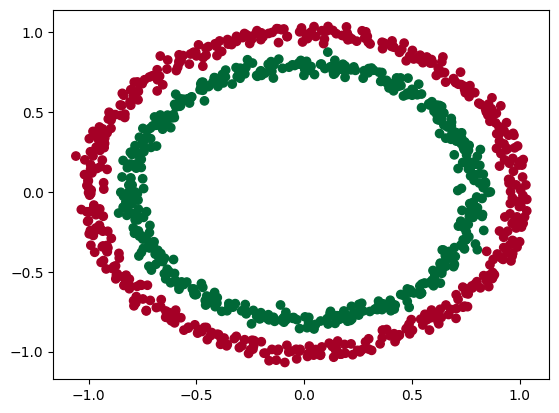

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlGn)

# Input and Output shapes of data

In [ ]:
# check shapes
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X[210],y[210]

(array([0.63680497, 0.74590966]), np.int64(0))

# Steps in Modelling

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X,y,epochs=20,verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4852 - loss: 0.6927


[0.69328773021698, 0.4729999899864197]

# Our model is getting only 50% Accuracy,Let's improve the model

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_2=tf.keras.Sequential([
    # tf.keras.layers.Input(shape=(2,1)),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4655 - loss: 0.6997


[0.6961022019386292, 0.4790000021457672]

# Improving Our Model

In [ ]:
tf.random.set_seed(42)

# 1. Create a model (3 Layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5141 - loss: 0.6914


[0.6950032711029053, 0.49300000071525574]

# To Visualize model predictions lets create function `plot_decision_boundries`

1. Take in Trained model , features and labels

2. Create a meshgrid of different values of X

3. Make predictions across the

4. Plot the predictions as well as a line between the Zones (Where each unique class falls)


In [ ]:
import numpy as np

In [ ]:
x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

In [ ]:
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100)),np.meshgrid(np.linspace(y_min,y_max,100))
xx,yy

((array([-1.15950246, -1.13633868, -1.1131749 , -1.09001112, -1.06684734,
         -1.04368356, -1.02051978, -0.997356  , -0.97419222, -0.95102844,
         -0.92786466, -0.90470088, -0.8815371 , -0.85837332, -0.83520954,
         -0.81204576, -0.78888198, -0.7657182 , -0.74255442, -0.71939064,
         -0.69622686, -0.67306308, -0.6498993 , -0.62673552, -0.60357174,
         -0.58040796, -0.55724418, -0.5340804 , -0.51091662, -0.48775284,
         -0.46458906, -0.44142528, -0.4182615 , -0.39509772, -0.37193394,
         -0.34877016, -0.32560638, -0.3024426 , -0.27927882, -0.25611504,
         -0.23295126, -0.20978748, -0.1866237 , -0.16345992, -0.14029614,
         -0.11713236, -0.09396858, -0.0708048 , -0.04764102, -0.02447724,
         -0.00131346,  0.02185032,  0.0450141 ,  0.06817788,  0.09134166,
          0.11450544,  0.13766922,  0.160833  ,  0.18399678,  0.20716056,
          0.23032434,  0.25348812,  0.2766519 ,  0.29981568,  0.32297946,
          0.34614324,  0.36930702,  0.

In [ ]:
def plot_decision_boundries(model,X,y):

    """
    plots the decision boundries Created by the model on X
    """
    # define the axis boundries of the plot and create the meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    #create x values
    x_in=np.c_[xx.ravel(),yy.ravel()]

    #make predictions
    y_pred = model.predict(x_in)

    #check for multiclass

    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    #plot the decision boundry

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:, 0],X[:, 1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


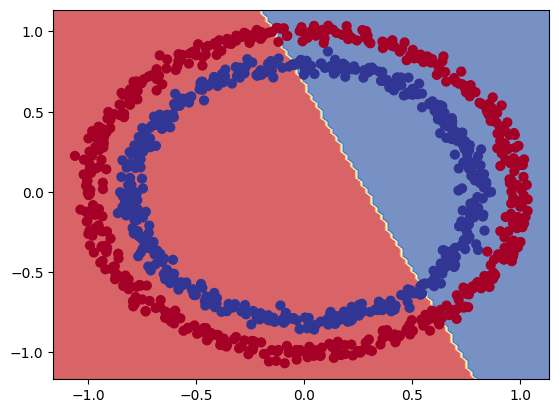

In [ ]:
plot_decision_boundries(model=model_3,
                        X=X,
                        y=y)

# Let's see if our model can be used for regression problem

In [ ]:
tf.random.set_seed(42)

X_regression=tf.range(0,1000,5)
Y_regression=tf.range(100,1100,5) #Y=X+100


In [ ]:
X_regression.shape

TensorShape([200])

In [ ]:
# split the data

X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]

Y_reg_train=Y_regression[:150]
Y_reg_test=Y_regression[150:]

In [ ]:
tf.random.set_seed(42)

# 1. Create a model (3 Layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# fit the model to regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),Y_reg_train,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(tf.expand_dims(X_reg_train,axis=-1),Y_reg_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 110.2248 - mae: 110.2248


[117.99036407470703, 117.99036407470703]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


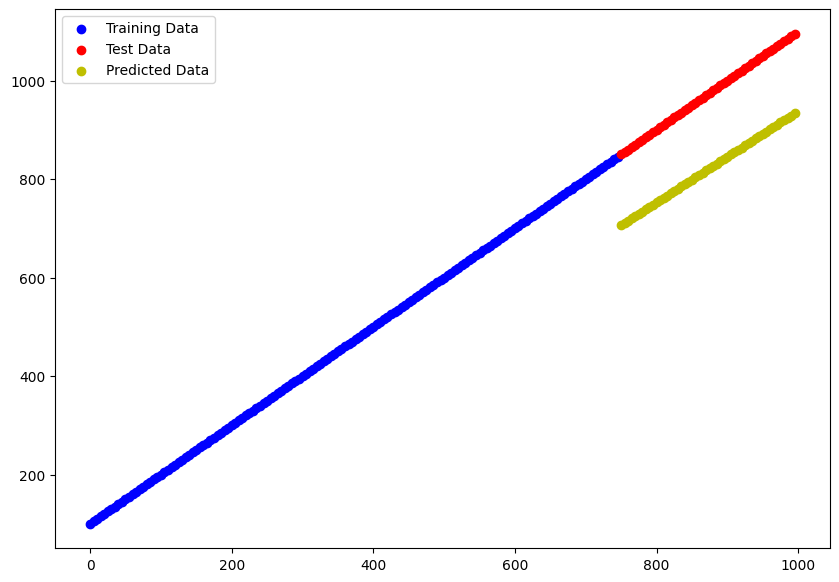

In [ ]:
#make predictions
Y_reg_pred=model_3.predict(tf.expand_dims(X_reg_test,axis=-1))

#plot models prediction
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,Y_reg_train,c="b",label="Training Data")
plt.scatter(X_reg_test,Y_reg_test,c="r",label="Test Data")
plt.scatter(X_reg_test,Y_reg_pred,c="y",label="Predicted Data")
plt.legend()

# Missing piece - Non Linearity

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)

])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_4.fit(X,y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4564 - loss: 6.7400
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4518 - loss: 6.5653
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4557 - loss: 6.3259
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4502 - loss: 5.7058
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4463 - loss: 4.8652
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4422 - loss: 4.8587
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4422 - loss: 4.8564
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4432 - loss: 4.8547
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4432 - loss: 4.8522
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4501 - loss: 4.8321
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4487 - loss: 4.8028
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

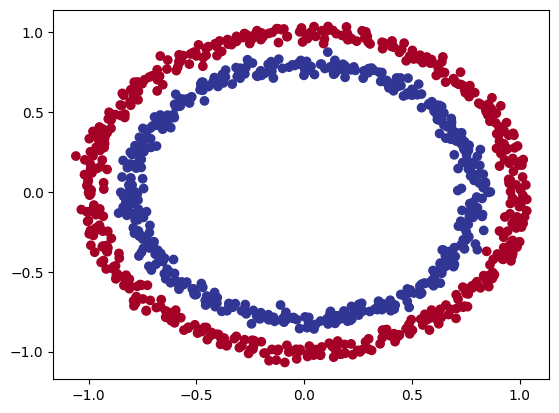

In [ ]:
# Visualise data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


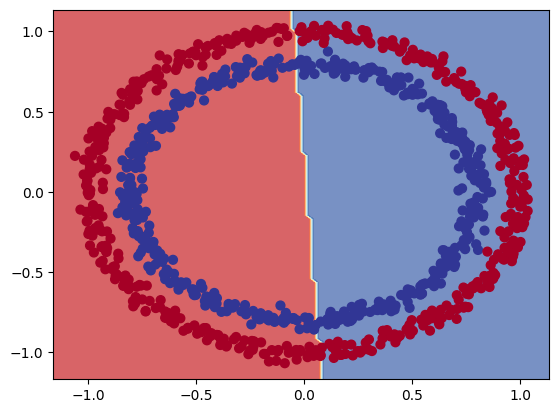

In [ ]:
# check decision boundry for latest model (model_4)
plot_decision_boundries(model=model_4,
                        X=X,
                        y=y)

# Let's create our first Neural Network with non-linear activation function

In [ ]:
tf.random.set_seed(42)

# 1.
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

# 2.
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3.
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4372 - loss: 4.4980
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4432 - loss: 2.7303
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4568 - loss: 0.7725
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4596 - loss: 0.7245
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 0.7084
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4780 - loss: 0.7004
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4792 - loss: 0.6965
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6946
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4899 - loss: 0.6938
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 0.6935
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760 - loss: 0.6935
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

# Replicate Multi-layer neural network from Tensorflow playground

In [ ]:
tf.random.set_seed(42)

# 1.
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2.
model_6.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# 3.
history=model_6.fit(X,y,epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5056 - loss: 0.6948
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5191 - loss: 0.6807
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5433 - loss: 0.6744
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6055 - loss: 0.6620
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.6415
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 0.6003
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8224 - loss: 0.5316
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9114 - loss: 0.4503
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 0.3599
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.2698
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.2024
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


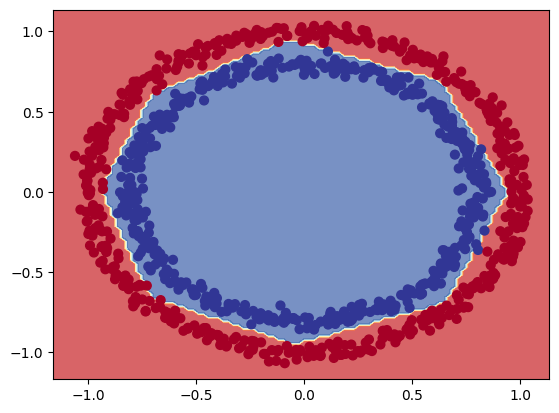

In [ ]:
plot_decision_boundries(model=model_6,X=X,y=y)

# Let's create Activation Function from Scratch


In [ ]:
# toy-tensor
A=tf.cast(tf.range(-100,100,4),tf.float32)
A

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

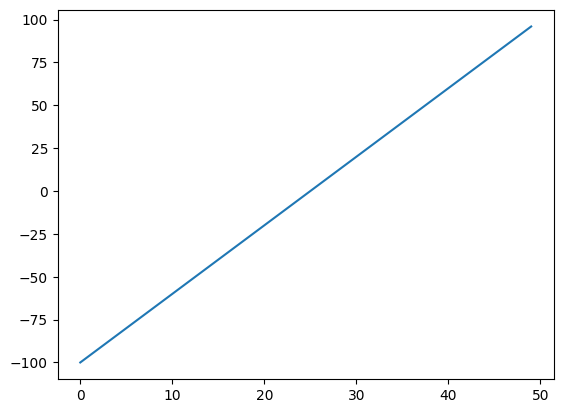

In [ ]:
# plot A
plt.plot(A)

## `Sigmoid Function`


In [ ]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))


In [ ]:
sigmoid(A)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.30570052e-37, 1.80485133e-35, 9.85415537e-34, 5.38018651e-32,
       2.93748195e-30, 1.60381094e-28, 8.75651089e-27, 4.78089250e-25,
       2.61027920e-23, 1.42516414e-21, 7.78113228e-20, 4.24835454e-18,
       2.31952270e-16, 1.26641649e-14, 6.91440015e-13, 3.77513437e-11,
       2.06115347e-09, 1.12535155e-07, 6.14417422e-06, 3.35350138e-04,
       1.79862101e-02, 5.00000000e-01, 9.82013762e-01, 9.99664664e-01,
       9.99993801e-01, 9.99999881e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00], dtype=float32)>

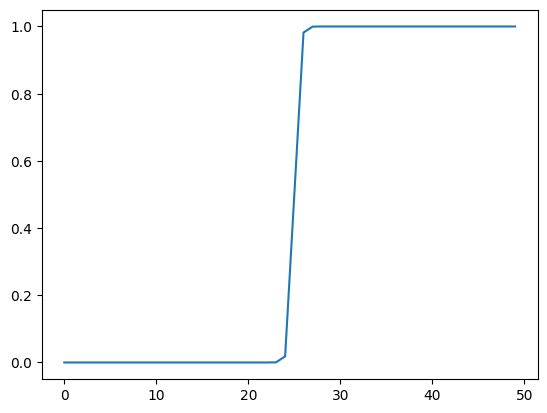

In [ ]:
plt.plot(sigmoid(A))

## `Tanh function`

In [ ]:
def tanh(x):
    return tf.maximum(0,x)


In [ ]:
tanh(A)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48., 52.,
       56., 60., 64., 68., 72., 76., 80., 84., 88., 92., 96.],
      dtype=float32)>

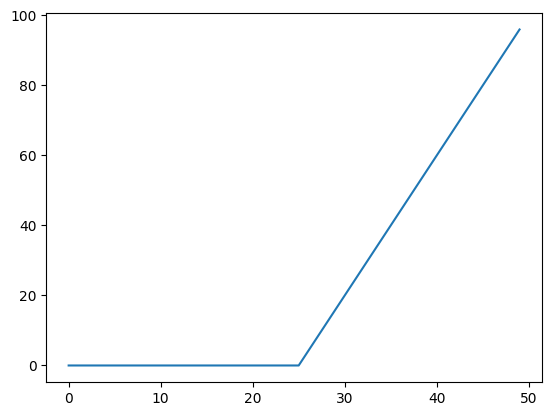

In [ ]:
plt.plot(tanh(A))

## `Linear`

In [ ]:
def linear(x):
    return x

In [ ]:
linear(A)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

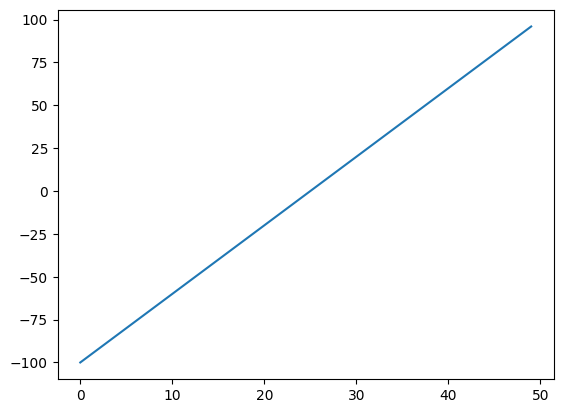

In [ ]:
plt.plot(linear(A))

# Evaluating and improving our Classification Model

`Let's create Test and Train Datasets`

In [ ]:
#Check how many samples we have
X.shape

(1000, 2)

In [ ]:
# split into test and train
X_train=X[:800]
X_test=X[800:]

y_train=y[:800]
y_test=y[800:]

len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# Recreate the model to fit on training data and evaluate on testing data


In [ ]:
tf.random.set_seed(42)

# 1.
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3.
hostory=model_7.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4679 - loss: 0.7032
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4807 - loss: 0.6939
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 0.6921
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5234 - loss: 0.6899
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5415 - loss: 0.6858
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5436 - loss: 0.6807
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5613 - loss: 0.6744
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.6669
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6011 - loss: 0.6599
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6030 - loss: 0.6526
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6084 - loss: 0.6456
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6236 - lo

In [ ]:
# Evaluate the model
model_7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7570 - loss: 0.4939


[0.48880425095558167, 0.7450000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


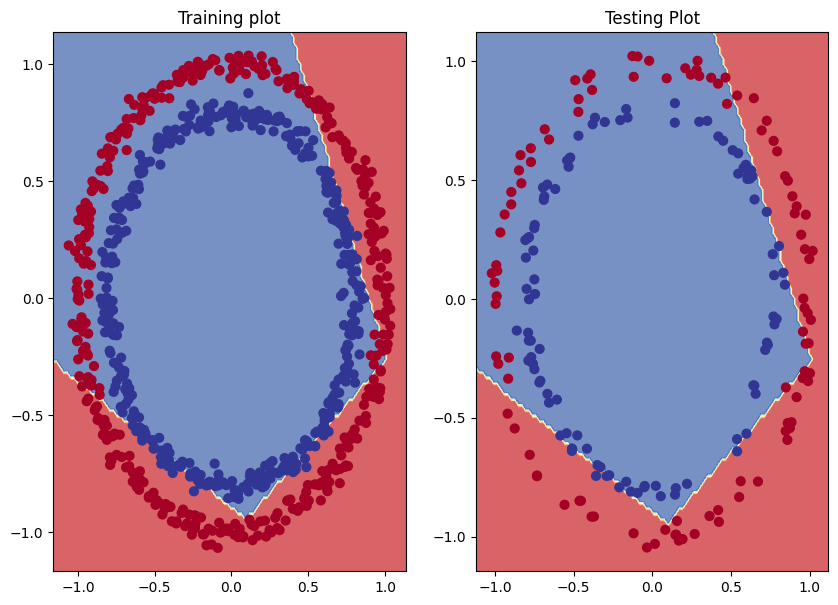

In [ ]:
# Plot decision Boundries for Training and Test data set
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Training plot")
plot_decision_boundries(model=model_7,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Testing Plot")
plot_decision_boundries(model=model_7,X=X_test,y=y_test)
plt.show()

In [ ]:
model_7.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (32, 4)                     │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 4)                     │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (32, 1)                     │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

# Plot the Loss or Training Curves

`Assigning model.fit to history variable is needed to plot the loss Curve`

In [ ]:
history.history

{'accuracy': [0.5270000100135803,
  0.5260000228881836,
  0.5649999976158142,
  0.6340000033378601,
  0.6970000267028809,
  0.7509999871253967,
  0.8489999771118164,
  0.9200000166893005,
  0.9620000123977661,
  0.984000027179718,
  0.9879999756813049,
  0.9879999756813049,
  0.9850000143051147,
  0.9879999756813049,
  0.9919999837875366,
  0.9919999837875366,
  0.9919999837875366,
  0.9919999837875366,
  0.9929999709129333,
  0.9940000176429749,
  0.9929999709129333,
  0.9919999837875366,
  0.9919999837875366,
  0.9919999837875366,
  0.9919999837875366,
  0.9919999837875366,
  0.9940000176429749,
  0.9940000176429749,
  0.9940000176429749,
  0.9940000176429749,
  0.9950000047683716,
  0.9950000047683716,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683,

In [ ]:
# convert history object into a Dataframe
pd.DataFrame(history.history)

,accuracy,loss
0,0.527,0.688044
1,0.526,0.677880
2,0.565,0.669888
3,0.634,0.656807
4,0.697,0.633044
...,...,...
145,0.996,0.008964
146,0.997,0.008819
147,0.997,0.008739
148,0.997,0.008697


Text(0.5, 1.0, 'Model_7 Plot')

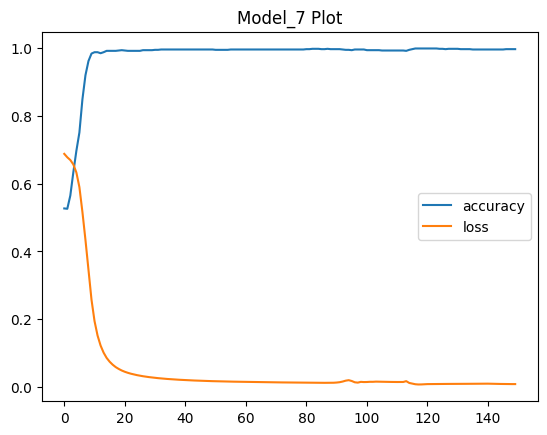

In [ ]:
# Plot the lost curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 Plot")

# Finding the best learning rate

To find the Ideal learning rate (the learning rate where the loss decreases the most during the Training) we're going to use the following Step.

A learning rate `Callback` - Extra piece of functionality added to the model while training `Works During Model Training`.


In [ ]:
tf.random.set_seed(42)

# 1.
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# create learning rate callback
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10 **(epoch/20))

# 3. (passing callback scheduler)
history_8=model_8.fit(X_train,y_train,epochs=100,
                    callbacks=[lr_schedular])  #can pass multiple callbacks in list

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5189 - loss: 0.6997 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5174 - loss: 0.6992 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5174 - loss: 0.6987 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5153 - loss: 0.6982 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5137 - loss: 0.6976 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5138 - loss: 0.6969 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5162 - loss: 0.6963 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5180 - loss: 0.6956 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5207 - loss: 0.6949 - learning_

<Axes: xlabel='epochs'>

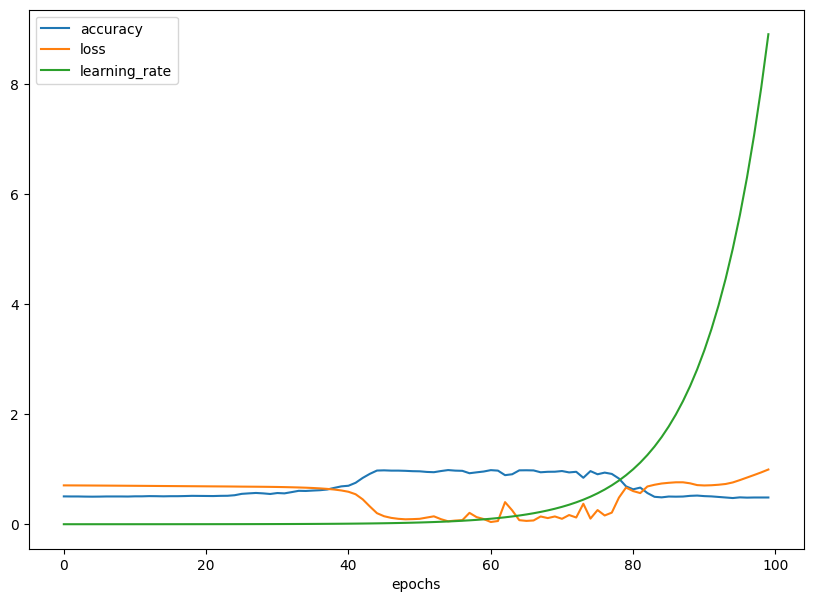

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

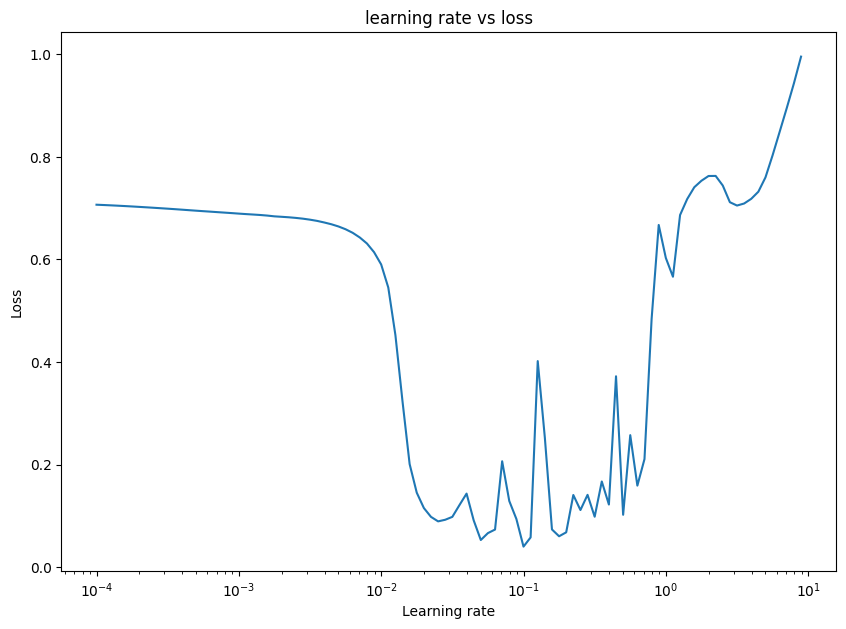

In [ ]:
# Plot the Learning rate vs Loss
lrs=1e-4 * (10 **(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_8.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("learning rate vs loss")

# Ideal Learning rate is lowest point on the Curve

In [ ]:
# Let's try using a IDEAL Learning rate with same model

tf.random.set_seed(42)

# 1.
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


# 3.
history_9=model_9.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5446 - loss: 0.6864
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 0.6678
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.6274
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7866 - loss: 0.5603
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7994 - loss: 0.4868
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.4098
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9194 - loss: 0.3347
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.2758
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9571 - loss: 0.2284
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9751 - loss: 0.1878
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9746 - loss: 0.1575
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9726 - lo

In [ ]:
model_9.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9761 - loss: 0.0748


[0.09997926652431488, 0.9599999785423279]

In [ ]:
model_7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7570 - loss: 0.4939 


[0.48880425095558167, 0.7450000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


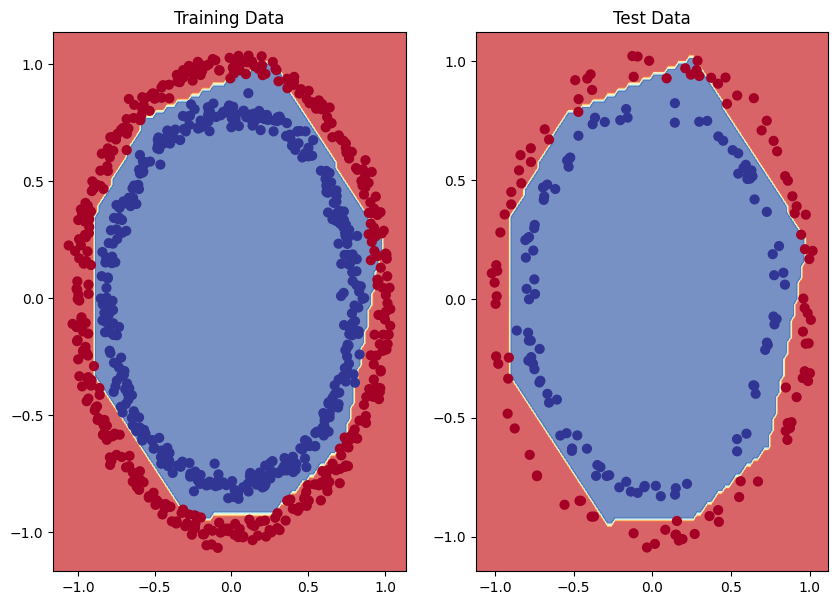

In [ ]:
#plot decision boundries for training and test data
plt.figure(figsize=(10,7))
plt.subplot(1,2,1) #plt.subplot(row,column,index)
plt.title("Training Data")
plot_decision_boundries(model=model_9,X=X_train,y=y_train)

plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundries(model=model_9,X=X_test,y=y_test)

# More Classification Evaluation Methods
`Accuracy`
`Precision`
`Recall`
`F1-Score`
`Confusion Matrix`
`Classification Report (Scikit Learn)`


In [ ]:
# check Accuracy and loss of model
loss,accuracy=model_9.evaluate(X_test,y_test)
print(f"Model Loss:{loss}")
print(f"Model accuracy:{(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0748 
Model Loss:0.09997926652431488
Model accuracy:96.00%


# How about Confusion Matrix ?

In [ ]:
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds=model_9.predict(X_test)

# Create confusion metrics
confusion_matrix(y_test,y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_preds[:10]

array([[0.96625984],
       [0.99791735],
       [0.98730505],
       [0.9944571 ],
       [0.29473296],
       [0.01645414],
       [0.9831116 ],
       [0.01369615],
       [0.9986808 ],
       [0.08660155]], dtype=float32)

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

#pretiffy confusion matrix

Confusion matrix code we are about to write is the remix of scikit-learn's plot_confusion_matrix

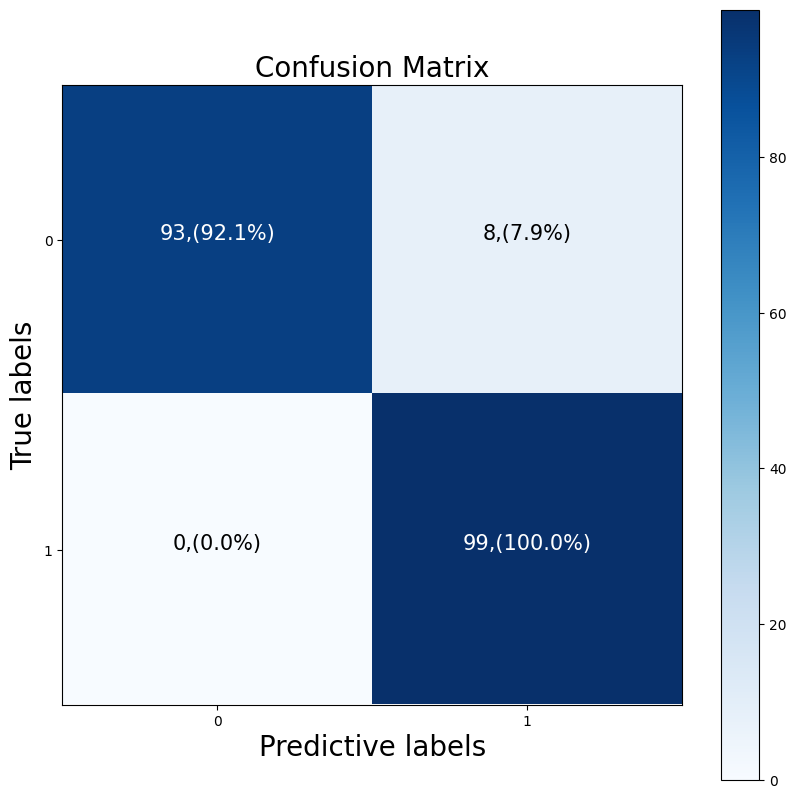

In [ ]:
import itertools

figsize=(10,10)

#create confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] #normalize the confusion matrix
n_classes=cm.shape[0]

#let's pretiffy this
fig,ax=plt.subplots(figsize=figsize)
#create a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes

classes=False
if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])

#label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predictive labels",
       ylabel="True labels",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels,
       )
#set x axis labels on bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#threshold for different colors
threshold=(cm.max()+cm.min())/2

#Plot the text on cells
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]},({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i,j]>threshold else "black",
             size=15)



# Working With a larger Example

`MultiClass Classification`

To practise multiclass classification we are going to build a neural network to clasify images of different items of cloathing .

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# The data is already sorted for training and testing
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Show first training examples
print(f"training data:\n{train_data[0]}")
print(f"training labels:\n{train_labels[0]}")

training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [ ]:
# shape of single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

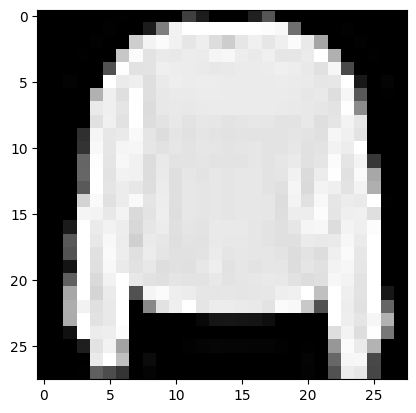

In [ ]:
# plot the single sample visuals
import matplotlib.pyplot as plt
plt.imshow(train_data[7],cmap="gray")

In [ ]:
train_labels[7]

np.uint8(2)

In [ ]:
# create a small list so that we can index onto our training labels so they are human readable

class_name=["Tshirt/top","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_name)

10

Text(0.5, 1.0, 'Coat')

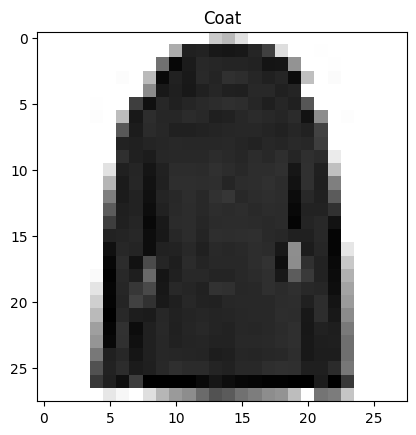

In [ ]:
#plot an example image and its label
plt.imshow(train_data[2000],cmap=plt.cm.binary)
plt.title(class_name[train_labels[2000]])

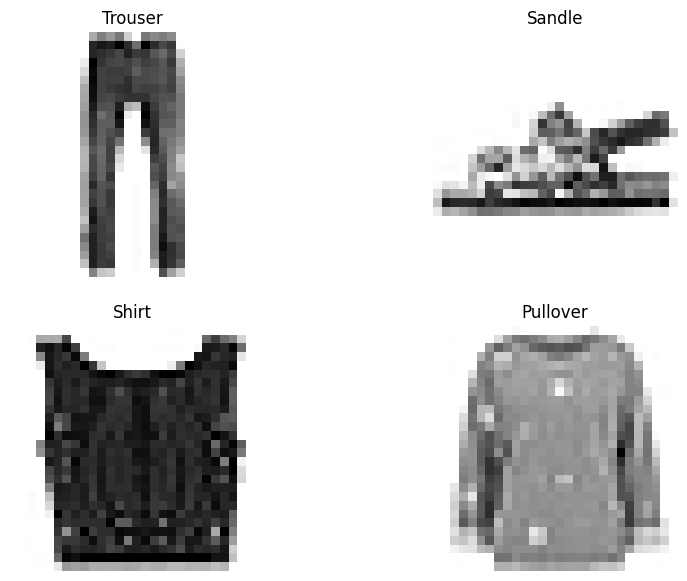

In [ ]:
# Plot Multiple images of fashion mnist
import random
plt.figure(figsize=(10,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

## Building a MultiClass Classification Model

Model architecture mostly remains the same as binary class classification.Things that are different are -

`Input shape` - 28 X 28

`Output shape` - 10 (1 per Class)

`loss function` - CategoricalcrossEntropy

`Output Activation` - Softmax


> 🔑 **NOTE** : `CategoricalCrossentropy()` - Used when Data is one_hot encoded, to continue without one_hot encoded use `SparseCategoricalCrossentropy()`

In [ ]:
tf.one_hot(train_labels[:5],depth=5)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

# 1.
model_10=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  #Flatten the data into input_shape=(none,28*28) shape
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.
non_norm_history=model_10.fit(tf.expand_dims(train_data,axis=-1),
                              tf.one_hot(train_labels,depth=10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1156 - loss: 5.9769 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0988 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0988 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.0985 - loss: 2.3028 - val_acc

In [ ]:
# Check model summary
model_10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Get data Ready

1. Turn all data into numbers

2. Make sure all Tensors are in Right Shape

3. Scale Features (normalize or standardize)

In [ ]:
train_data.min(),train_data.max()

(np.uint8(0), np.uint8(255))

In [ ]:
# Normalize the data (Achieved by dividing the data with maximum)

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
tf.random.set_seed(42)

# 1.
model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  #Flatten the data into (none,28*28) shape
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.
norm_history=model_11.fit(tf.expand_dims(train_data_norm,axis=-1),
                              train_labels,
                              epochs=10,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4161 - loss: 1.6067 - val_accuracy: 0.6612 - val_loss: 0.9830
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6786 - loss: 0.9195 - val_accuracy: 0.6975 - val_loss: 0.8274
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7077 - loss: 0.7958 - val_accuracy: 0.7387 - val_loss: 0.7296
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7546 - loss: 0.7003 - val_accuracy: 0.7659 - val_loss: 0.6682
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7739 - loss: 0.6420 - val_accuracy: 0.7720 - val_loss: 0.6358
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7832 - loss: 0.6090 - val_accuracy: 0.7776 - val_loss: 0.6151
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7883 - loss: 0.5922 - val_accuracy: 0.7785 - val_loss: 0.6079
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7907 - loss: 0.5824 -

> 🔑 **Note** - Neural Network tend to accept data in Numerical as well as Scaled data

<Axes: title={'center': 'Normalized Data'}>

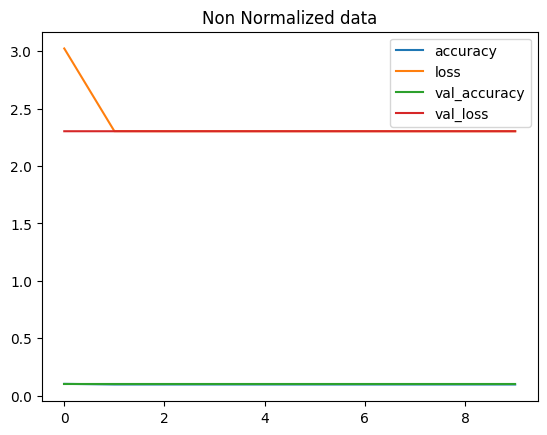

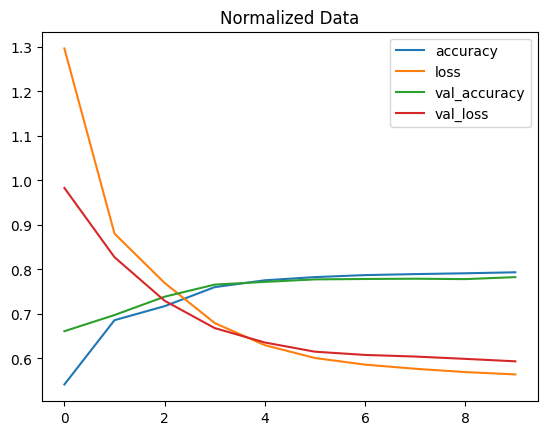

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non Normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding Ideal Learning Rate

In [ ]:
tf.random.set_seed(42)

# 1.
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  #Flatten the data into (none,28*28) shape
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create learning rate callback
lr_schedular_multiclass=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# 3.
lr_history=model_12.fit(tf.expand_dims(train_data_norm,axis=-1),
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm,test_labels),
                        callbacks=[lr_schedular_multiclass])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3646 - loss: 1.6477 - val_accuracy: 0.6611 - val_loss: 0.9270 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7047 - loss: 0.8446 - val_accuracy: 0.7738 - val_loss: 0.7133 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7846 - loss: 0.6659 - val_accuracy: 0.7867 - val_loss: 0.6489 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7966 - loss: 0.6096 - val_accuracy: 0.7924 - val_loss: 0.6170 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8053 - loss: 0.5812 - val_accuracy: 0.7945 - val_loss: 0.6026 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8096 - loss: 0.5652 - val_accuracy: 0.7973 - val_loss: 0.5938 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8123 -

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

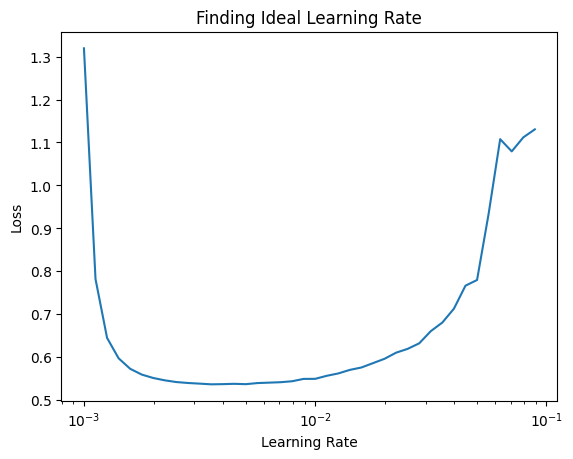

In [ ]:
# Plot Learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs_multiclass=1e-3* (10**(tf.range(40)/20))
plt.semilogx(lrs_multiclass,lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [ ]:
# Refit the model with ideal Learning Rate

tf.random.set_seed(42)

# 1.
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),  #Flatten the data into (none,28*28) shape
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


# 3.
history_13=model_13.fit(tf.expand_dims(train_data_norm,axis=-1),
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4287 - loss: 1.5183 - val_accuracy: 0.7072 - val_loss: 0.8030
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7236 - loss: 0.7629 - val_accuracy: 0.7422 - val_loss: 0.7296
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7494 - loss: 0.7032 - val_accuracy: 0.7537 - val_loss: 0.6974
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7646 - loss: 0.6658 - val_accuracy: 0.7698 - val_loss: 0.6654
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7803 - loss: 0.6324 - val_accuracy: 0.7799 - val_loss: 0.6487
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7915 - loss: 0.6106 - val_accuracy: 0.7851 - val_loss: 0.6360
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7976 - loss: 0.5954 - val_accuracy: 0.7890 - val_loss: 0.6271
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8016 - loss: 0.5839 -

## Evaluating multiclass Classification Model
    
1. Evaluate It's performance using evaluation matrix
2. Assess Some of it's predictions
3. Imporve it's result
4. Save and export it for use of Application



In [ ]:
# Create a Confusion Matrix

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

    #create confusion matrix
    cm=confusion_matrix(y_true,y_preds)
    cm_norm=cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] #normalize the confusion matrix
    n_classes=cm.shape[0]

    #let's pretiffy this
    fig,ax=plt.subplots(figsize=figsize)
    #create a matrix plot
    cax=ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes

    if classes:
        labels=classes
    else:
        labels=np.arange(cm.shape[0])

    #label the axis
    ax.set(title="Confusion Matrix",
        xlabel="Predictive labels",
        ylabel="True labels",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )
    #set x axis labels on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #adjust label size
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.title.set_size(15)

    #threshold for different colors
    threshold=(cm.max()+cm.min())/2

    #Plot the text on cells
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]},({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size=15)


In [ ]:
class_name

['Tshirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandle',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

> 🔑 **NOTE** - Make predictions On what your Data is trained (train_data or train_data_norm)

In [ ]:
# Make some predictions
y_probs=model_13.predict(test_data_norm)  #probs is short for prediction probabilities
y_probs[:1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0564791e-10, 2.2907116e-04, 9.0869019e-09, 1.4896678e-07,
        1.3534364e-07, 3.2129481e-01, 1.3253346e-09, 1.2797563e-01,
        6.4913424e-05, 5.5043525e-01]], dtype=float32)

In [ ]:
y_probs[0],tf.argmax(y_probs[0]),class_name[tf.argmax(y_probs[0])]

(array([1.0564791e-10, 2.2907116e-04, 9.0869019e-09, 1.4896678e-07,
        1.3534364e-07, 3.2129481e-01, 1.3253346e-09, 1.2797563e-01,
        6.4913424e-05, 5.5043525e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
#convert all prediction probabilites into integers
y_preds=tf.argmax(y_probs,axis=-1)

#view first 10 predictions
y_preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])>

In [ ]:
model_13.evaluate(test_data,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6987 - loss: 143.2393


[151.01470947265625, 0.6945000290870667]

In [ ]:
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[739,   2,  26,  77,   5,   6, 137,   0,   7,   1],
       [  3, 931,   6,  37,   7,   4,   4,   0,   4,   4],
       [ 13,   3, 703,   9, 167,   1,  72,   0,  32,   0],
       [ 51,  18,  15, 786,  36,   6,  68,   0,  16,   4],
       [  0,   2, 185,  16, 704,   0,  66,   0,  27,   0],
       [  0,   1,   0,   0,   0, 895,   0,  60,   8,  36],
       [135,   4, 179,  55, 133,   2, 469,   0,  22,   1],
       [  0,   0,   0,   0,   0,  38,   0, 948,   0,  14],
       [  4,   3,  37,   2,   4,  35,   8,   4, 903,   0],
       [  0,   3,   1,   0,   0,  26,   0,  72,   0, 898]])

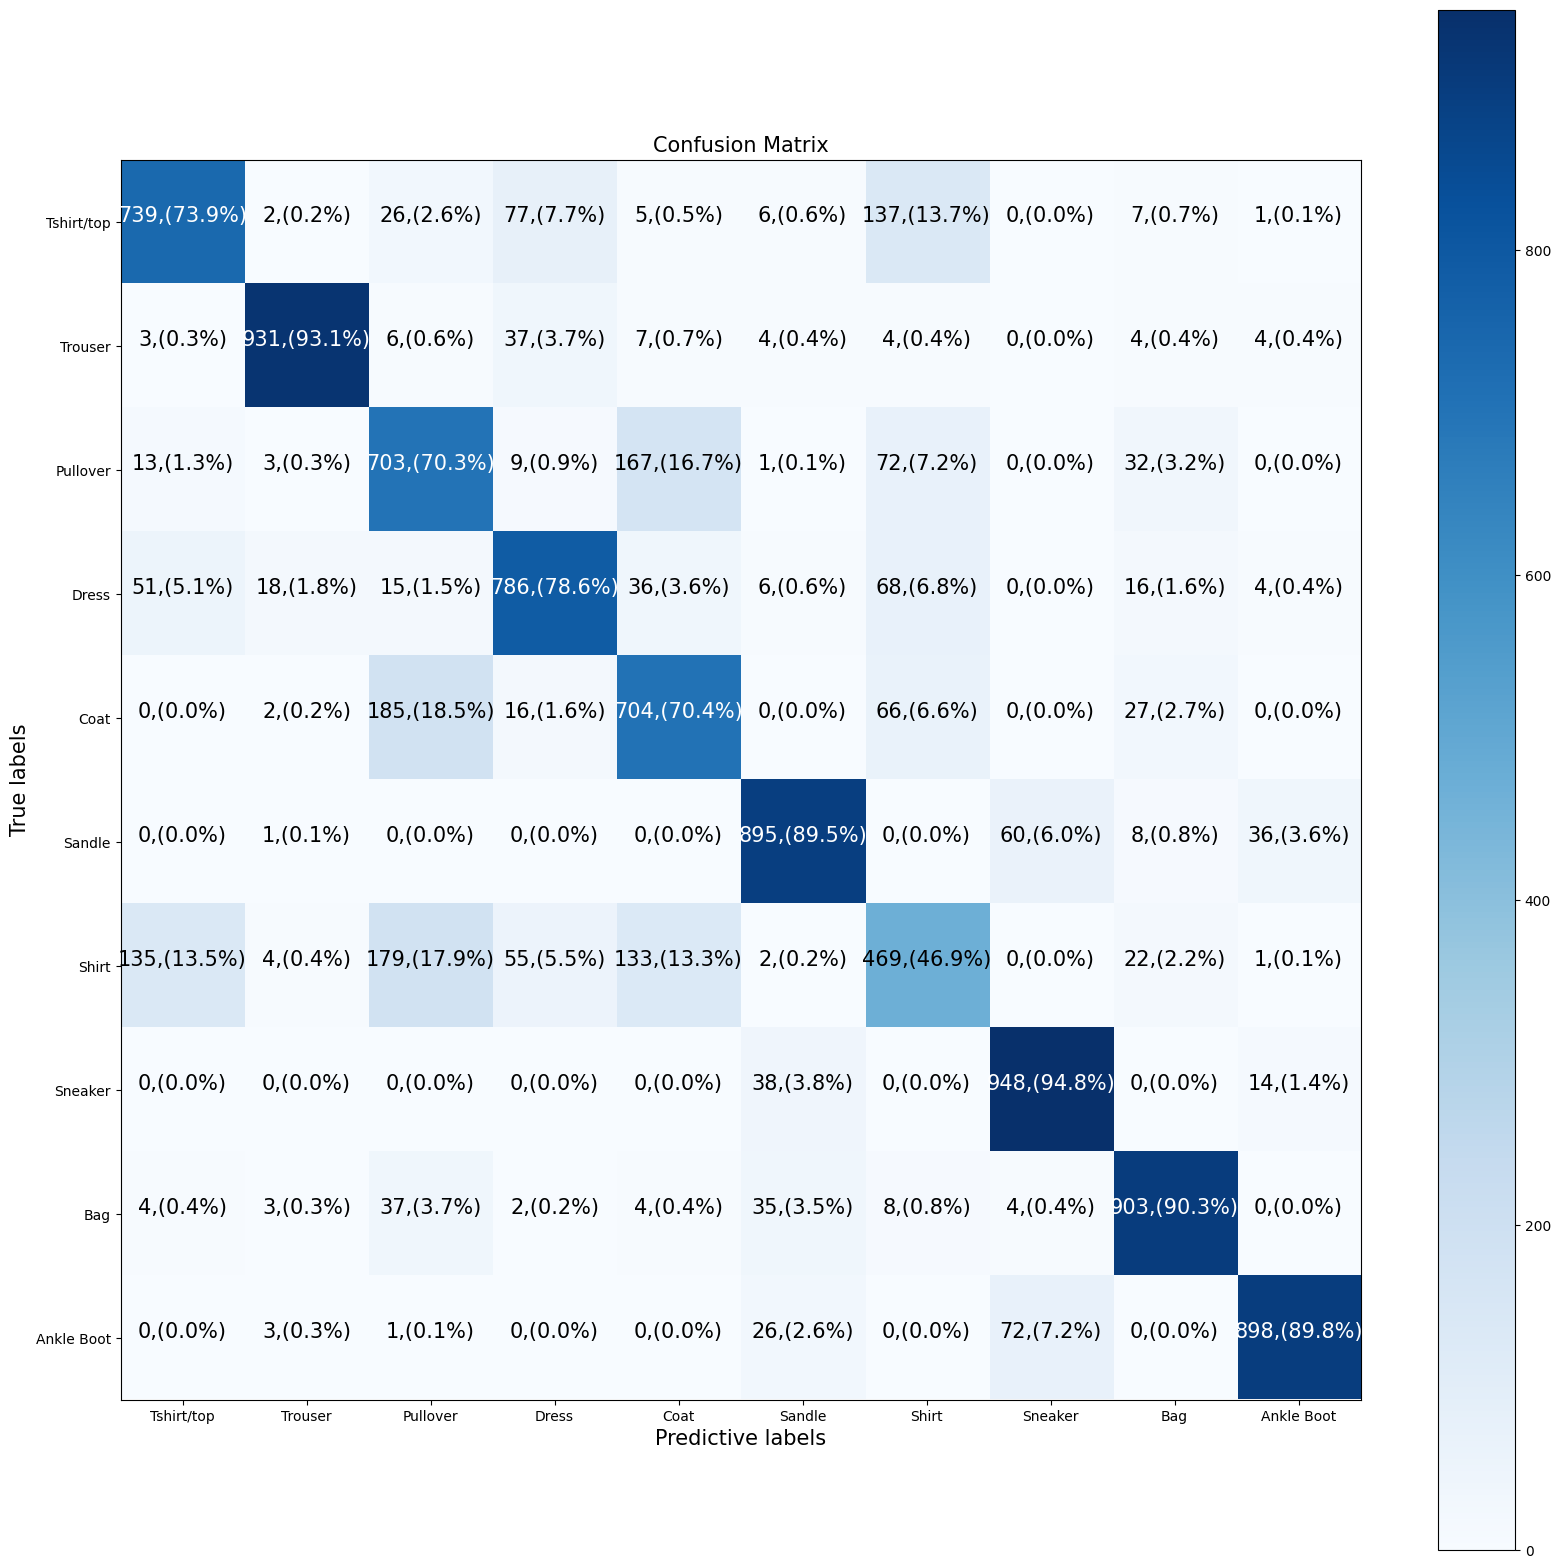

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_name,figsize=(20,20),text_size=7)

## Little function for -

*   Plot Random Image
*   Make a prediction on said Image
*   Label the plot with truth and predicted data



In [ ]:
import random

def plot_random_img(model,images,true_labels,class_name):
    """
    Picks a random image plots it and labels it with prediction and truth label
    """
    # set random number
    i=random.randint(0,len(images))

    #create predictions and targets
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))
    pred_label=class_name[pred_probs.argmax()]
    true_label=class_name[true_labels[i]]

    # plot the image
    plt.imshow(target_image,cmap=plt.cm.binary)

    #change the color of title depending upon prediction is right or wrong
    if pred_label==true_label:
        color="green"
    else:
        color="red"

    #Add X_label information
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color) #sets color based on prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


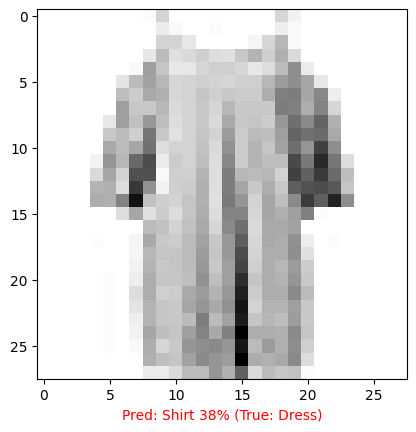

In [ ]:
#check out a random image as well as its predictions
# Make prediction on same kind of data trained on
plot_random_img(model=model_13,images=test_data_norm,true_labels=test_labels,class_name=class_name)

## What pattern is Our model learning...

In [ ]:
model_13.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [ ]:
# Extract a particular layer
model_13.layers[1]

<Dense name=dense_9, built=True>

In [ ]:
# Get the patterns of layer in our networks
weights,biases=model_13.layers[1].get_weights()

#shapes
weights,weights.shape

(array([[-0.58477926,  0.04993391, -0.5199641 ,  0.6299531 ],
        [-0.21846206,  0.70741147,  0.3136201 , -0.7385069 ],
        [-1.59948   ,  0.06934379,  0.76255506, -0.1887351 ],
        ...,
        [-0.63802874, -0.26997134,  0.09381638, -0.11454472],
        [-0.45005825, -0.33401304, -0.2922866 ,  0.58775634],
        [-0.84578925,  0.787841  , -0.15190202,  0.98088384]],
       dtype=float32),
 (784, 4))

In [ ]:
# now checkout bias vector
biases,biases.shape

(array([0.57747895, 0.2574276 , 0.39970145, 0.3945934 ], dtype=float32), (4,))

## Every neuron has a bias vector . Each of these is paired with a weight matrix. The Bias Vector gets initialized as zeros

`The bias vector dictates how much the pattern within the corresponding matrix should influence the next layer`

> 🔑 `Weights have one data point per value while biases have 1 Value Per hidden unit`

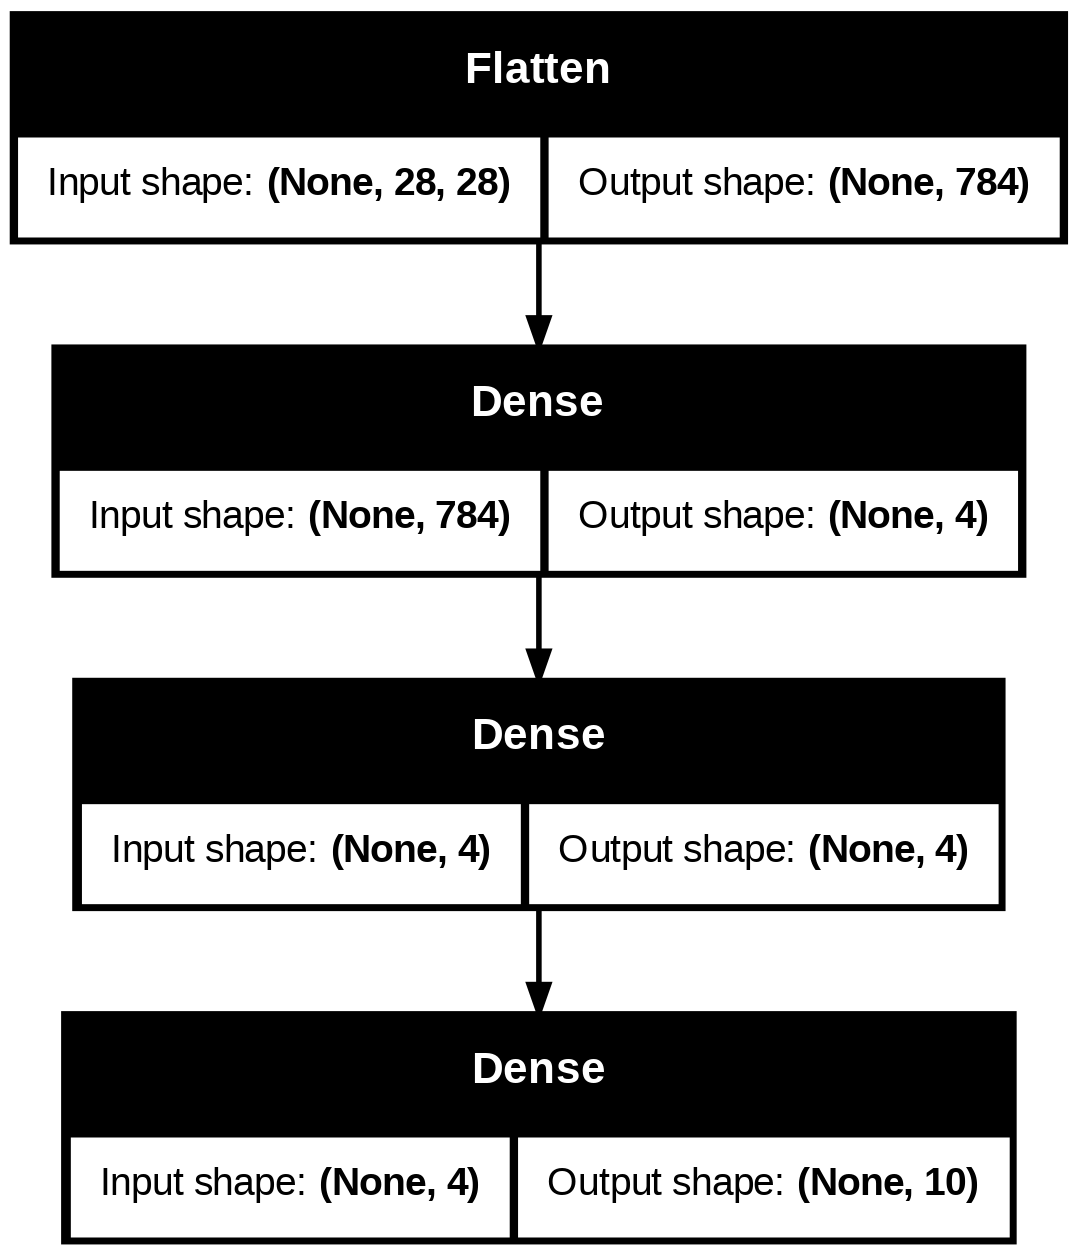

In [ ]:
# Other Ways of Viewing Our deep learning Model
from tensorflow.keras.utils import plot_model
plot_model(model_13,show_shapes=True)